In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Hotel-Room.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0                           listing_url  \
0            48          48   https://www.airbnb.com/rooms/281134   
1            62          62  https://www.airbnb.com/rooms/1565220   
2            75          75  https://www.airbnb.com/rooms/1736063   
3           100         100   https://www.airbnb.com/rooms/571166   
4           135         135   https://www.airbnb.com/rooms/737328   

  last_scraped                                        description  \
0   2024-09-26  Amazing Pent House apartment in the heart fo C...   
1   2024-09-26  Beautiful, spacious and calm independent Suite...   
2   2024-09-26  Small, very practical and beautiful independen...   
3   2024-09-26  This is a one bedroom furnished apartment in t...   
4   2024-09-26                            No contiene descripción   

                                    host_url  host_since host_response_time  \
0   https://www.airbnb.com/users/show/196253  2010-08-09     within an hour   
1  https://www.airbnb.com/users/show/2518152  2012-06-01     within an hour   
2  https://www.airbnb.com/users/show/2518152  2012-06-01     within an hour   
3   https://www.airbnb.com/users/show/196253  2010-08-09     within an hour   
4  https://www.airbnb.com/users/show/3850198  2012-10-12     within an hour   

  host_response_rate host_acceptance_rate  ... review_scores_accuracy  \
0               100%                  93%  ...                   4.71   
1               100%                  92%  ...                   5.00   
2               100%                  92%  ...                   4.84   
3               100%                  93%  ...                   5.00   
4               100%                  89%  ...                   4.88   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                      5.00                  5.00                        5.00   
1                      5.00                  5.00                        4.96   
2                      4.97                  4.89                        4.93   
3                      5.00                  5.00                        4.92   
4                      4.84                  5.00                        5.00   

  review_scores_location calculated_host_listings_count  \
0                   5.00                            8.0   
1                   4.93                            7.0   
2                   4.96                            7.0   
3                   5.00                            8.0   
4                   4.84                           11.0   

  calculated_host_listings_count_entire_homes  \
0                                         4.0   
1                                         1.0   
2                                         1.0   
3                                         4.0   
4                                         7.0   

  calculated_host_listings_count_private_rooms  \
0                                          1.0   
1                                          4.0   
2                                          4.0   
3                                          1.0   
4                                          0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              0.06  
1                                         0.0              0.21  
2                                         0.0              0.45  
3                                         0.0              0.01  
4                                         0.0              0.18  

[5 rows x 52 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

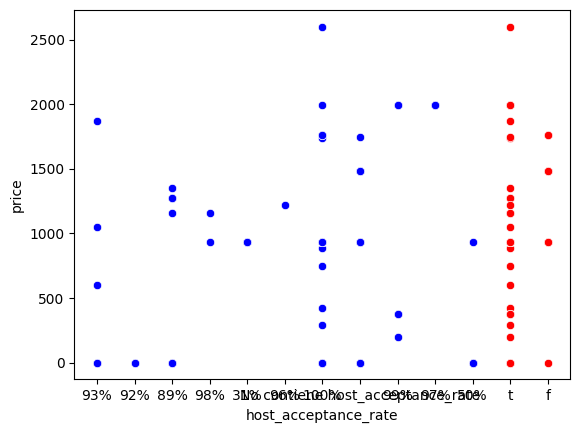

In [9]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [10]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

A

float64


LinearRegression()

In [14]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-227.75571028]),
 'rank_': 1,
 'singular_': array([5.03591295]),
 'intercept_': np.float64(924.1231683867433)}

In [15]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.027848585410072513

In [16]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([712.31035782, 714.58791493, 714.58791493, 712.31035782,
       721.42058623, 721.42058623, 721.42058623, 721.42058623,
       700.92257231, 853.5188982 , 705.47768651, 700.92257231,
       853.5188982 , 853.5188982 , 696.3674581 , 696.3674581 ,
       721.42058623, 853.5188982 , 696.3674581 , 924.12316839,
       698.64501521, 703.20012941, 696.3674581 , 698.64501521,
       703.20012941, 696.3674581 , 721.42058623, 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 712.31035782, 696.3674581 , 703.20012941,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 696.3674581 , 712.31035782, 721.42058623,
       924.12316839, 696.3674581 , 712.31035782, 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.36

In [17]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones  Unnamed: 0.1  Unnamed: 0  \
0      712.310358            48          48   
1      714.587915            62          62   
2      714.587915            75          75   
3      712.310358           100         100   
4      721.420586           135         135   
..            ...           ...         ...   
120    924.123168         24907       24907   
121    924.123168         24908       24908   
122    924.123168         24909       24909   
123    924.123168         24910       24910   
124    924.123168         24911       24911   

                                          listing_url last_scraped  \
0                 https://www.airbnb.com/rooms/281134   2024-09-26   
1                https://www.airbnb.com/rooms/1565220   2024-09-26   
2                https://www.airbnb.com/rooms/1736063   2024-09-26   
3                 https://www.airbnb.com/rooms/571166   2024-09-26   
4                 https://www.airbnb.com/rooms/737328   2024-09-26   
..                                                ...          ...   
120  https://www.airbnb.com/rooms/1191430079828817253   2024-09-26   
121  https://www.airbnb.com/rooms/1191430130484570539   2024-09-26   
122  https://www.airbnb.com/rooms/1191430238014754309   2024-09-26   
123  https://www.airbnb.com/rooms/1191430521084135024   2024-09-26   
124  https://www.airbnb.com/rooms/1191431981766770022   2024-09-26   

                                           description  \
0    Amazing Pent House apartment in the heart fo C...   
1    Beautiful, spacious and calm independent Suite...   
2    Small, very practical and beautiful independen...   
3    This is a one bedroom furnished apartment in t...   
4                              No contiene descripción   
..                                                 ...   
120  Stay in the heart of Mexico City and be near t...   
121  Stay in the heart of Mexico City and be near t...   
122  Stay in the heart of Mexico City and be near t...   
123  Stay in the heart of Mexico City and be near t...   
124  Stay in the heart of Mexico City and be near t...   

                                        host_url  host_since  \
0       https://www.airbnb.com/users/show/196253  2010-08-09   
1      https://www.airbnb.com/users/show/2518152  2012-06-01   
2      https://www.airbnb.com/users/show/2518152  2012-06-01   
3       https://www.airbnb.com/users/show/196253  2010-08-09   
4      https://www.airbnb.com/users/show/3850198  2012-10-12   
..                                           ...         ...   
120  https://www.airbnb.com/users/show/547380140  2023-11-20   
121  https://www.airbnb.com/users/show/547380140  2023-11-20   
122  https://www.airbnb.com/users/show/547380140  2023-11-20   
123  https://www.airbnb.com/users/show/547380140  2023-11-20   
124  https://www.airbnb.com/users/show/547380140  2023-11-20   

    host_response_time host_response_rate  ...  review_scores_accuracy  \
0       within an hour               100%  ...                    4.71   
1       within an hour               100%  ...                    5.00   
2       within an hour               100%  ...                    4.84   
3       within an hour               100%  ...                    5.00   
4       within an hour               100%  ...                    4.88   
..                 ...                ...  ...                     ...   
120     within an hour               100%  ...                    4.79   
121     within an hour               100%  ...                    4.79   
122     within an hour               100%  ...                    4.79   
123     within an hour               100%  ...                    4.79   
124     within an hour               100%  ...                    4.79   

    review_scores_cleanliness review_scores_checkin  \
0                        5.00                  5.00   
1                        5.00                  5.00   
2                        4.97                  4.89   
3                       

In [18]:
df.head()

Predicciones  Unnamed: 0.1  Unnamed: 0  \
0    712.310358            48          48   
1    714.587915            62          62   
2    714.587915            75          75   
3    712.310358           100         100   
4    721.420586           135         135   

                            listing_url last_scraped  \
0   https://www.airbnb.com/rooms/281134   2024-09-26   
1  https://www.airbnb.com/rooms/1565220   2024-09-26   
2  https://www.airbnb.com/rooms/1736063   2024-09-26   
3   https://www.airbnb.com/rooms/571166   2024-09-26   
4   https://www.airbnb.com/rooms/737328   2024-09-26   

                                         description  \
0  Amazing Pent House apartment in the heart fo C...   
1  Beautiful, spacious and calm independent Suite...   
2  Small, very practical and beautiful independen...   
3  This is a one bedroom furnished apartment in t...   
4                            No contiene descripción   

                                    host_url  host_since host_response_time  \
0   https://www.airbnb.com/users/show/196253  2010-08-09     within an hour   
1  https://www.airbnb.com/users/show/2518152  2012-06-01     within an hour   
2  https://www.airbnb.com/users/show/2518152  2012-06-01     within an hour   
3   https://www.airbnb.com/users/show/196253  2010-08-09     within an hour   
4  https://www.airbnb.com/users/show/3850198  2012-10-12     within an hour   

  host_response_rate  ...  review_scores_accuracy review_scores_cleanliness  \
0               100%  ...                    4.71                      5.00   
1               100%  ...                    5.00                      5.00   
2               100%  ...                    4.84                      4.97   
3               100%  ...                    5.00                      5.00   
4               100%  ...                    4.88                      4.84   

  review_scores_checkin review_scores_communication review_scores_location  \
0                  5.00                        5.00                   5.00   
1                  5.00                        4.96                   4.93   
2                  4.89                        4.93                   4.96   
3                  5.00                        4.92                   5.00   
4                  5.00                        5.00                   4.84   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            8.0                                         4.0   
1                            7.0                                         1.0   
2                            7.0                                         1.0   
3                            8.0                                         4.0   
4                           11.0                                         7.0   

  calculated_host_listings_count_private_rooms  \
0                                          1.0   
1                                          4.0   
2                                          4.0   
3                                          1.0   
4                                          0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              0.06  
1                                         0.0              0.21  
2                                         0.0              0.45  
3                                         0.0              0.01  
4                                         0.0              0.18  

[5 rows x 53 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

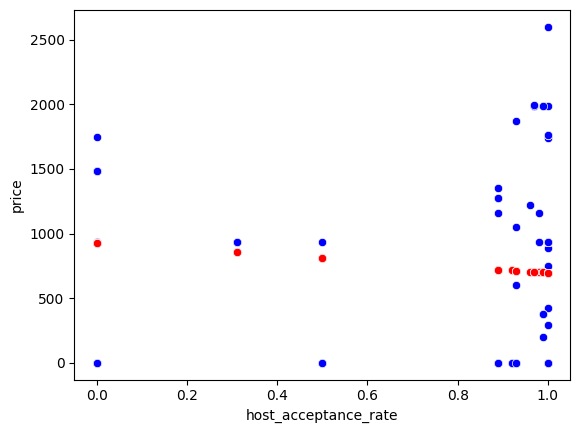

In [19]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='red',data = df)

In [20]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.027848585410072513

In [21]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.16687895436534983)

In [22]:
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


C:\Users\joker\AppData\Local\Temp\ipykernel_14992\68322890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


In [23]:
df['room_type'] = 4


In [24]:
df.head(2)

Predicciones  Unnamed: 0.1  Unnamed: 0  \
0    712.310358            48          48   
1    714.587915            62          62   

                            listing_url last_scraped  \
0   https://www.airbnb.com/rooms/281134   2024-09-26   
1  https://www.airbnb.com/rooms/1565220   2024-09-26   

                                         description  \
0  Amazing Pent House apartment in the heart fo C...   
1  Beautiful, spacious and calm independent Suite...   

                                    host_url  host_since host_response_time  \
0   https://www.airbnb.com/users/show/196253  2010-08-09     within an hour   
1  https://www.airbnb.com/users/show/2518152  2012-06-01     within an hour   

  host_response_rate  ...  review_scores_accuracy  review_scores_cleanliness  \
0               100%  ...                    4.71                        5.0   
1               100%  ...                    5.00                        5.0   

  review_scores_checkin  review_scores_communication review_scores_location  \
0                   5.0                         5.00                   5.00   
1                   5.0                         4.96                   4.93   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            8.0                                         4.0   
1                            7.0                                         1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           4.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              0.06  
1                                         0.0              0.21  

[2 rows x 53 columns]

In [25]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]


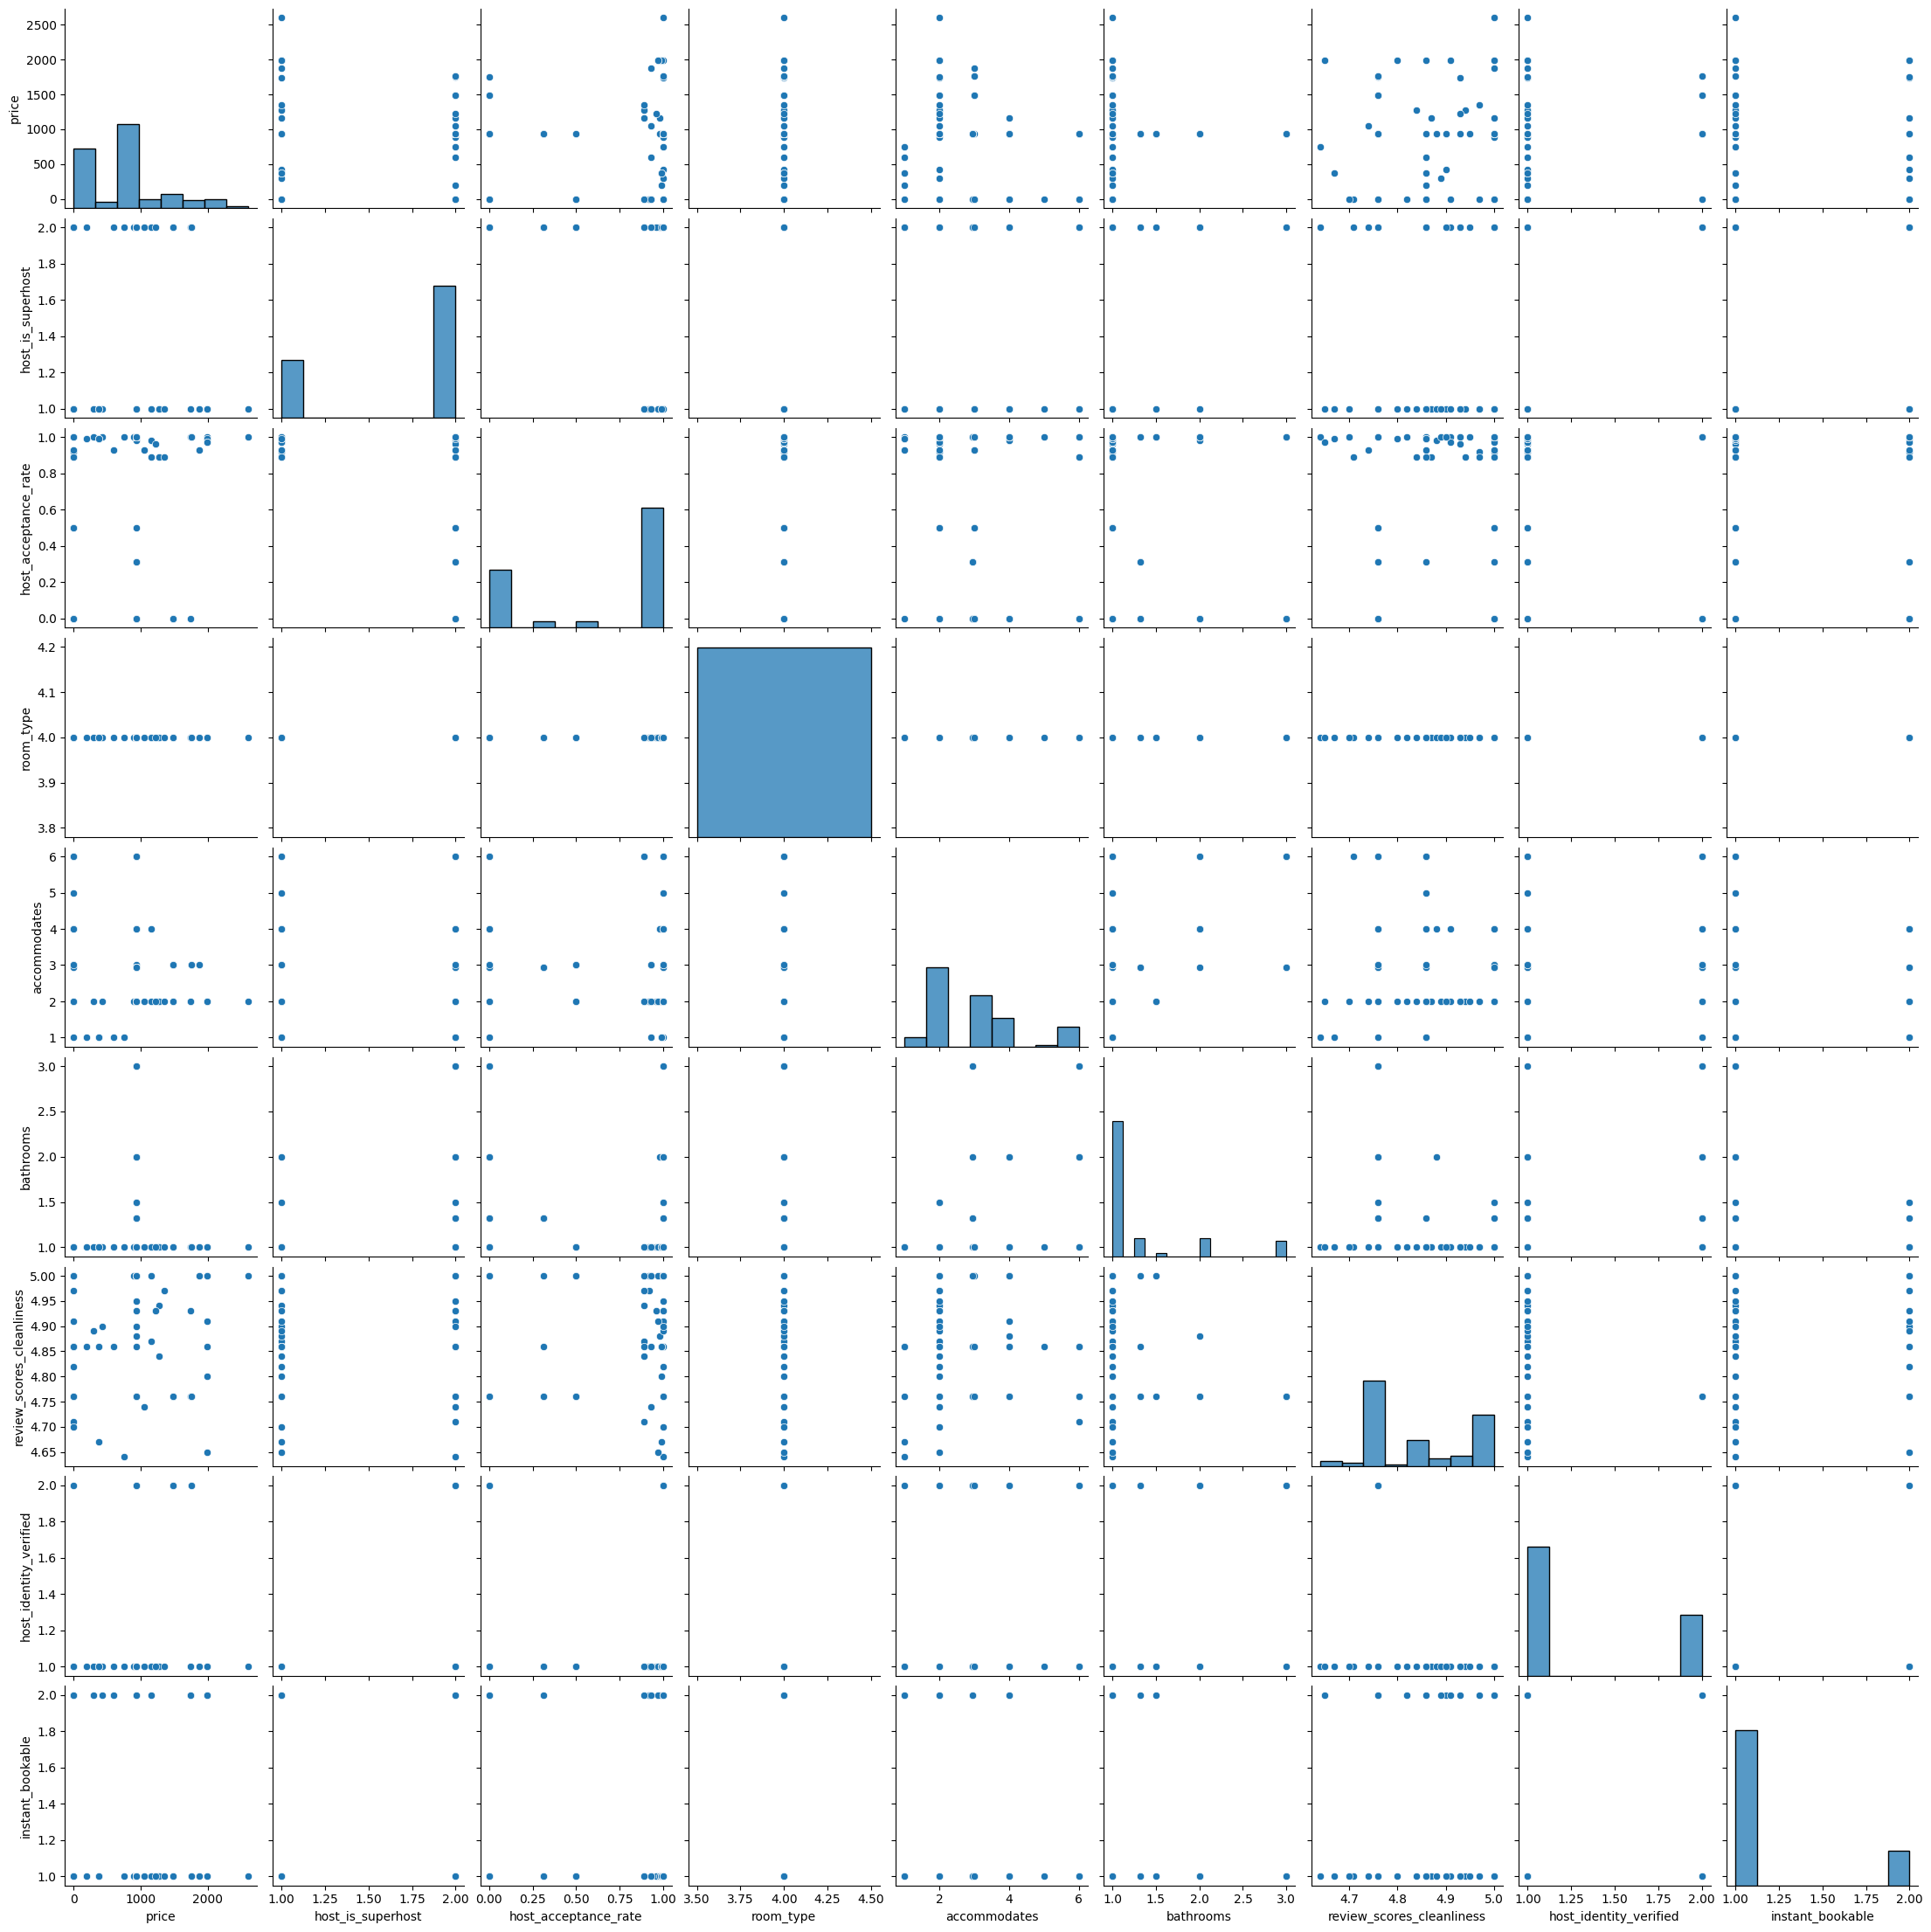

In [26]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [27]:
# Calcular nuevamente las correlaciones
Corr_Factors = df.corr()
Corr_Factors


price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.084197             -0.166879   
host_is_superhost          0.084197           1.000000             -0.482462   
host_acceptance_rate      -0.166879          -0.482462              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates              -0.140011           0.138379             -0.252245   
bathrooms                  0.127452           0.288047             -0.387553   
review_scores_cleanliness -0.217300          -0.259305              0.383090   
host_identity_verified     0.317026           0.453370             -0.717207   
instant_bookable          -0.069886          -0.224781              0.091849   

                           room_type  accommodates  bathrooms  \
price                            NaN     -0.140011   0.127452   
host_is_superhost                NaN      0.138379   0.288047   
host_acceptance_rate             NaN     -0.252245  -0.387553   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.548105   
bathrooms                        NaN      0.548105   1.000000   
review_scores_cleanliness        NaN     -0.218107  -0.376158   
host_identity_verified           NaN      0.352701   0.540327   
instant_bookable                 NaN     -0.222866  -0.210063   

                           review_scores_cleanliness  host_identity_verified  \
price                                      -0.217300                0.317026   
host_is_superhost                          -0.259305                0.453370   
host_acceptance_rate                        0.383090               -0.717207   
room_type                                        NaN                     NaN   
accommodates                               -0.218107                0.352701   
bathrooms                                  -0.376158                0.540327   
review_scores_cleanliness                   1.000000               -0.573643   
host_identity_verified                     -0.573643                1.000000   
instant_bookable                            0.278402               -0.281490   

                           instant_bookable  
price                             -0.069886  
host_is_superhost                 -0.224781  
host_acceptance_rate               0.091849  
room_type                               NaN  
accommodates                      -0.222866  
bathrooms                         -0.210063  
review_scores_cleanliness          0.278402  
host_identity_verified            -0.281490  
instant_bookable                   1.000000

In [28]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.084197              0.166879   
host_is_superhost          0.084197           1.000000              0.482462   
host_acceptance_rate       0.166879           0.482462              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.140011           0.138379              0.252245   
bathrooms                  0.127452           0.288047              0.387553   
review_scores_cleanliness  0.217300           0.259305              0.383090   
host_identity_verified     0.317026           0.453370              0.717207   
instant_bookable           0.069886           0.224781              0.091849   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.140011   0.127452   
host_is_superhost                NaN      0.138379   0.288047   
host_acceptance_rate             NaN      0.252245   0.387553   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.548105   
bathrooms                        NaN      0.548105   1.000000   
review_scores_cleanliness        NaN      0.218107   0.376158   
host_identity_verified           NaN      0.352701   0.540327   
instant_bookable                 NaN      0.222866   0.210063   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.217300                0.317026   
host_is_superhost                           0.259305                0.453370   
host_acceptance_rate                        0.383090                0.717207   
room_type                                        NaN                     NaN   
accommodates                                0.218107                0.352701   
bathrooms                                   0.376158                0.540327   
review_scores_cleanliness                   1.000000                0.573643   
host_identity_verified                      0.573643                1.000000   
instant_bookable                            0.278402                0.281490   

                           instant_bookable  
price                              0.069886  
host_is_superhost                  0.224781  
host_acceptance_rate               0.091849  
room_type                               NaN  
accommodates                       0.222866  
bathrooms                          0.210063  
review_scores_cleanliness          0.278402  
host_identity_verified             0.281490  
instant_bookable                   1.000000

<Axes: >

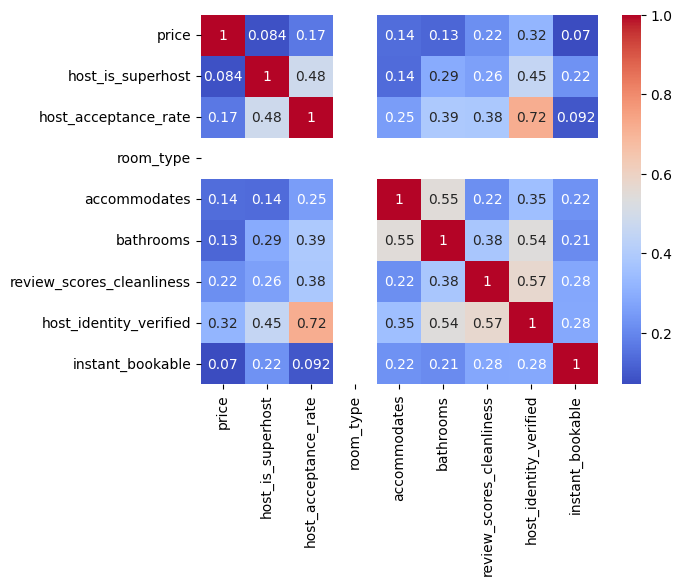

In [29]:
#Mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, annot=True, cmap='coolwarm')
Heat_Map

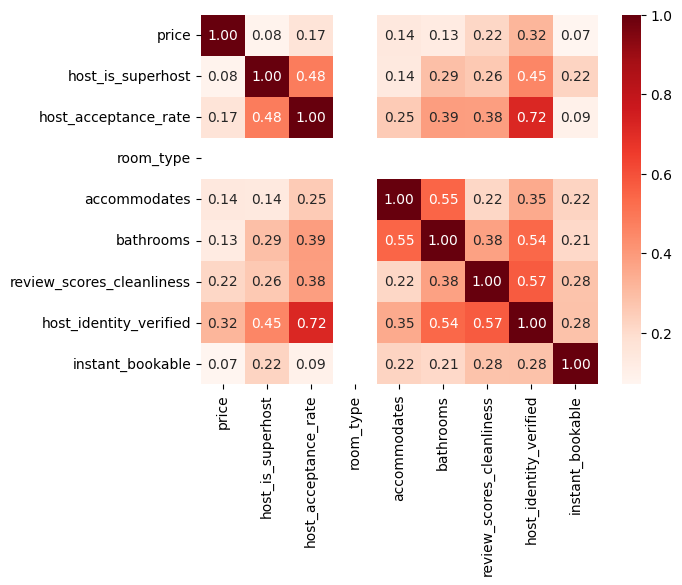

In [30]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")

Price vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

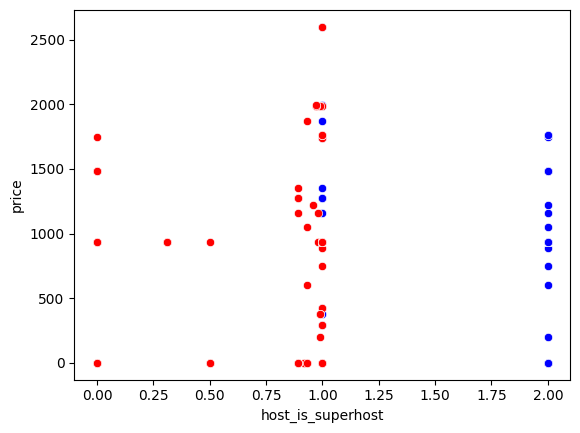

In [31]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [32]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [35]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([112.52365396]),
 'rank_': 1,
 'singular_': array([5.1427619]),
 'intercept_': np.float64(586.1710828796131)}

In [36]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.00708906000042675

In [37]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       811.2183908 , 811.2183908 , 811.2183908 , 698.69473684,
       811.2183908 , 811.2183908 , 698.69473684, 811.2183908 ,
       811.2183908 , 811.2183908 , 811.2183908 , 811.2183908 ,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 698.69473684, 811.2183908 , 698.69473684,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 811.2183908 , 698.69473684, 698.69473684,
       811.2183908 , 698.69473684, 811.2183908 , 811.2183908 ,
       811.2183908 , 698.69473684, 811.2183908 , 811.2183908 ,
       811.2183908 , 811.2183908 , 698.69473684, 811.2183908 ,
       811.2183908 , 811.2183908 , 811.2183908 , 811.2183908 ,
       811.2183908 , 811.2183908 , 811.2183908 , 811.21

In [38]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones   price  host_is_superhost  host_acceptance_rate  room_type  \
0      698.694737     0.0                  1                  0.93          4   
1      698.694737     0.0                  1                  0.92          4   
2      698.694737     0.0                  1                  0.92          4   
3      698.694737  1872.0                  1                  0.93          4   
4      698.694737  1275.0                  1                  0.89          4   
..            ...     ...                ...                   ...        ...   
120    811.218391   932.7                  2                  0.00          4   
121    811.218391   932.7                  2                  0.00          4   
122    811.218391   932.7                  2                  0.00          4   
123    811.218391  1484.0                  2                  0.00          4   
124    811.218391  1484.0                  2                  0.00          4   

     accommodates  bathrooms  review_scores_cleanliness  \
0            3.00       1.00                       5.00   
1            2.00       1.00                       5.00   
2            2.00       1.00                       4.97   
3            3.00       1.00                       5.00   
4            2.00       1.00                       4.84   
..            ...        ...                        ...   
120          2.94       1.32                       4.76   
121          2.94       1.32                       4.76   
122          2.94       1.32                       4.76   
123          2.00       1.00                       4.76   
124          3.00       1.00                       4.76   

     host_identity_verified  instant_bookable  
0                         1                 1  
1                         1                 2  
2                         1                 2  
3                         1                 1  
4                         1                 1  
..                      ...               ...  
120                       2                 1  
121                       2                 1  
122                       2                 1  
123                       2                 1  
124                       2                 1  

[125 rows x 10 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

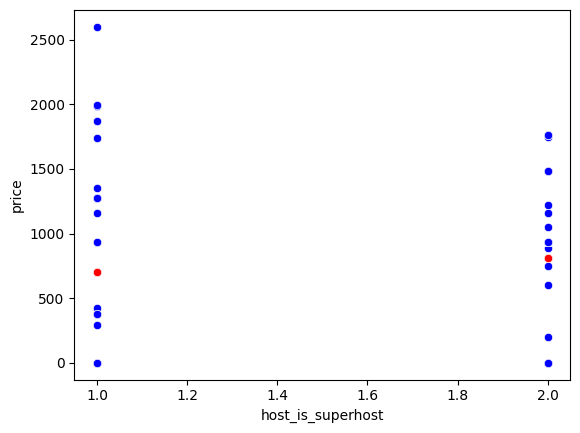

In [39]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost',y='price',color='blue',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones',color='red',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

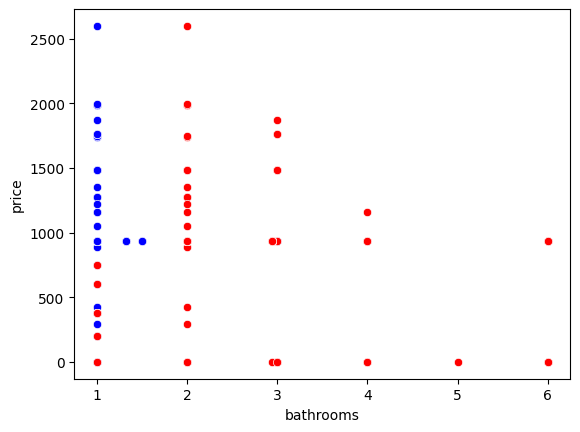

In [40]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='blue',data=df)
sns.scatterplot(x='accommodates',y='price',color='red',data=df)

In [41]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
type(model)

sklearn.linear_model._base.LinearRegression

In [44]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [45]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([133.7858511]),
 'rank_': 1,
 'singular_': array([6.54761905]),
 'intercept_': np.float64(603.7959828580206)}

In [46]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.01624408829888957

In [47]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([ 737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  780.39330632,  737.58183396,  871.36768507,
        780.39330632,  780.39330632,  737.58183396,  737.58183396,
        737.58183396,  780.39330632,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  804.47475951,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  804.47475

In [48]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)
df

Predicciones2  Predicciones   price  host_is_superhost  \
0       737.581834    698.694737     0.0                  1   
1       737.581834    698.694737     0.0                  1   
2       737.581834    698.694737     0.0                  1   
3       737.581834    698.694737  1872.0                  1   
4       737.581834    698.694737  1275.0                  1   
..             ...           ...     ...                ...   
120     780.393306    811.218391   932.7                  2   
121     780.393306    811.218391   932.7                  2   
122     780.393306    811.218391   932.7                  2   
123     737.581834    811.218391  1484.0                  2   
124     737.581834    811.218391  1484.0                  2   

     host_acceptance_rate  room_type  accommodates  bathrooms  \
0                    0.93          4          3.00       1.00   
1                    0.92          4          2.00       1.00   
2                    0.92          4          2.00       1.00   
3                    0.93          4          3.00       1.00   
4                    0.89          4          2.00       1.00   
..                    ...        ...           ...        ...   
120                  0.00          4          2.94       1.32   
121                  0.00          4          2.94       1.32   
122                  0.00          4          2.94       1.32   
123                  0.00          4          2.00       1.00   
124                  0.00          4          3.00       1.00   

     review_scores_cleanliness  host_identity_verified  instant_bookable  
0                         5.00                       1                 1  
1                         5.00                       1                 2  
2                         4.97                       1                 2  
3                         5.00                       1                 1  
4                         4.84                       1                 1  
..                         ...                     ...               ...  
120                       4.76                       2                 1  
121                       4.76                       2                 1  
122                       4.76                       2                 1  
123                       4.76                       2                 1  
124                       4.76                       2                 1  

[125 rows x 11 columns]

<Axes: xlabel='bathrooms', ylabel='price'>

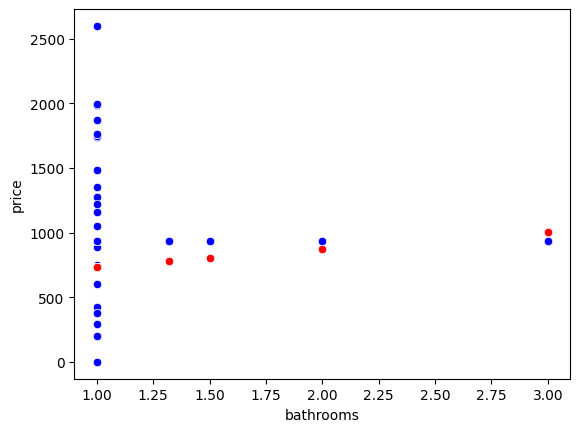

In [49]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms',y='price',color='blue',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='red',data = df)

In [50]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.01624408829888957

In [51]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.1274522981310638)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

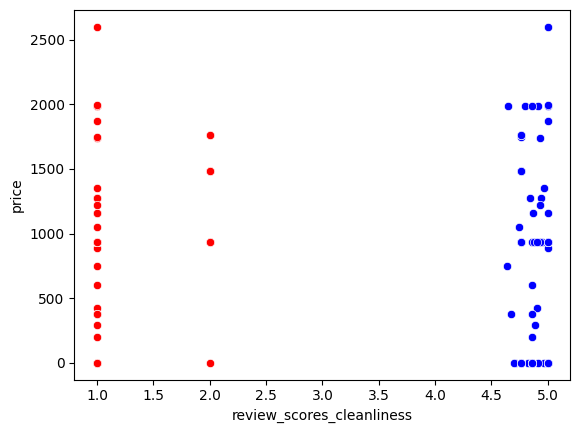

In [52]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [53]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
type(model)

sklearn.linear_model._base.LinearRegression

In [56]:

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [57]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1252.29686709]),
 'rank_': 1,
 'singular_': array([1.19261058]),
 'intercept_': np.float64(6849.64916789471)}

In [58]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.04721935691111834

In [59]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([ 588.16483244,  588.16483244,  625.73373846,  588.16483244,
        788.53233118,  663.30264447,  750.96342516,  625.73373846,
        588.16483244,  763.48639384,  675.82561314,  738.44045649,
        888.71608054,  588.16483244,  713.39451915, 1038.9917046 ,
        951.3309239 ,  888.71608054,  700.87155048,  588.16483244,
        838.62420586,  700.87155048,  588.16483244,  763.48639384,
       1026.46873592,  813.57826852,  763.48639384,  675.82561314,
        725.91748782,  763.48639384,  763.48639384,  588.16483244,
        588.16483244,  588.16483244,  763.48639384,  763.48639384,
        763.48639384,  763.48639384,  763.48639384,  763.48639384,
        963.85389257,  763.48639384,  588.16483244,  588.16483244,
        588.16483244,  888.71608054,  588.16483244,  588.16483244,
        588.16483244,  888.71608054,  913.76201789,  588.16483244,
        888.71608054,  588.16483244,  588.16483244,  588.16483244,
        588.16483244,  650.7796758 ,  675.82561314,  588.16483

In [60]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)
df

Predicciones3  Predicciones2  Predicciones   price  host_is_superhost  \
0       588.164832     737.581834    698.694737     0.0                  1   
1       588.164832     737.581834    698.694737     0.0                  1   
2       625.733738     737.581834    698.694737     0.0                  1   
3       588.164832     737.581834    698.694737  1872.0                  1   
4       788.532331     737.581834    698.694737  1275.0                  1   
..             ...            ...           ...     ...                ...   
120     888.716081     780.393306    811.218391   932.7                  2   
121     888.716081     780.393306    811.218391   932.7                  2   
122     888.716081     780.393306    811.218391   932.7                  2   
123     888.716081     737.581834    811.218391  1484.0                  2   
124     888.716081     737.581834    811.218391  1484.0                  2   

     host_acceptance_rate  room_type  accommodates  bathrooms  \
0                    0.93          4          3.00       1.00   
1                    0.92          4          2.00       1.00   
2                    0.92          4          2.00       1.00   
3                    0.93          4          3.00       1.00   
4                    0.89          4          2.00       1.00   
..                    ...        ...           ...        ...   
120                  0.00          4          2.94       1.32   
121                  0.00          4          2.94       1.32   
122                  0.00          4          2.94       1.32   
123                  0.00          4          2.00       1.00   
124                  0.00          4          3.00       1.00   

     review_scores_cleanliness  host_identity_verified  instant_bookable  
0                         5.00                       1                 1  
1                         5.00                       1                 2  
2                         4.97                       1                 2  
3                         5.00                       1                 1  
4                         4.84                       1                 1  
..                         ...                     ...               ...  
120                       4.76                       2                 1  
121                       4.76                       2                 1  
122                       4.76                       2                 1  
123                       4.76                       2                 1  
124                       4.76                       2                 1  

[125 rows x 12 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

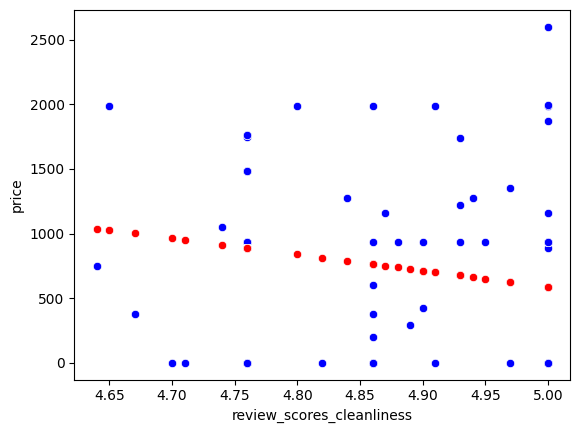

In [61]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='red',data = df)

In [62]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.04721935691111834

In [63]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.21730015396018093)

preice vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

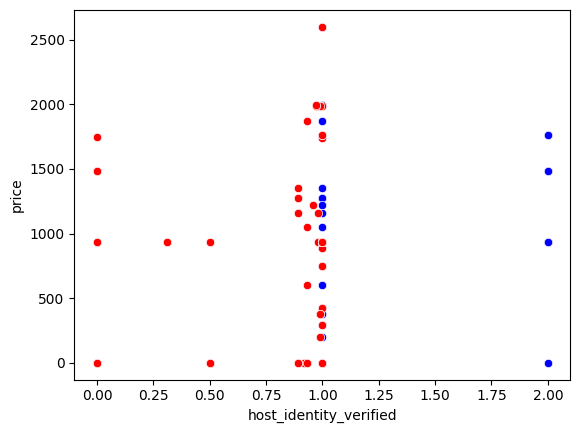

In [64]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [65]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [67]:
type(model)

sklearn.linear_model._base.LinearRegression

In [68]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [69]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([417.78867647]),
 'rank_': 1,
 'singular_': array([5.21536192]),
 'intercept_': np.float64(225.5301470588231)}

In [70]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.10050563152161629

In [71]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([ 643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
       1061.1075    ,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882

In [72]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

Predicciones4  Predicciones3  Predicciones2  Predicciones   price  \
0       643.318824     588.164832     737.581834    698.694737     0.0   
1       643.318824     588.164832     737.581834    698.694737     0.0   
2       643.318824     625.733738     737.581834    698.694737     0.0   
3       643.318824     588.164832     737.581834    698.694737  1872.0   
4       643.318824     788.532331     737.581834    698.694737  1275.0   
..             ...            ...            ...           ...     ...   
120    1061.107500     888.716081     780.393306    811.218391   932.7   
121    1061.107500     888.716081     780.393306    811.218391   932.7   
122    1061.107500     888.716081     780.393306    811.218391   932.7   
123    1061.107500     888.716081     737.581834    811.218391  1484.0   
124    1061.107500     888.716081     737.581834    811.218391  1484.0   

     host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0                    1                  0.93          4          3.00   
1                    1                  0.92          4          2.00   
2                    1                  0.92          4          2.00   
3                    1                  0.93          4          3.00   
4                    1                  0.89          4          2.00   
..                 ...                   ...        ...           ...   
120                  2                  0.00          4          2.94   
121                  2                  0.00          4          2.94   
122                  2                  0.00          4          2.94   
123                  2                  0.00          4          2.00   
124                  2                  0.00          4          3.00   

     bathrooms  review_scores_cleanliness  host_identity_verified  \
0         1.00                       5.00                       1   
1         1.00                       5.00                       1   
2         1.00                       4.97                       1   
3         1.00                       5.00                       1   
4         1.00                       4.84                       1   
..         ...                        ...                     ...   
120       1.32                       4.76                       2   
121       1.32                       4.76                       2   
122       1.32                       4.76                       2   
123       1.00                       4.76                       2   
124       1.00                       4.76                       2   

     instant_bookable  
0                   1  
1                   2  
2                   2  
3                   1  
4                   1  
..                ...  
120                 1  
121                 1  
122                 1  
123                 1  
124                 1  

[125 rows x 13 columns]

<Axes: xlabel='host_identity_verified', ylabel='price'>

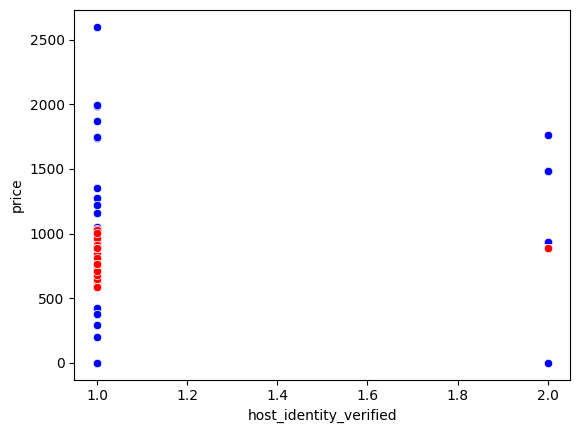

In [73]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified',y='price',color='blue',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones3',color='red',data = df)

In [74]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.10050563152161629

In [75]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.31702623159861126)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

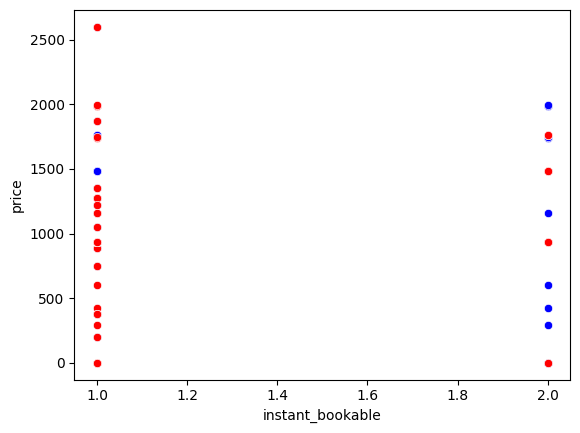

In [76]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [77]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [79]:
type(model)

sklearn.linear_model._base.LinearRegression

In [80]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [81]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-110.87263427]),
 'rank_': 1,
 'singular_': array([4.33220498]),
 'intercept_': np.float64(908.2843989769821)}

In [82]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.004883991395986054

In [83]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([797.41176471, 686.53913043, 686.53913043, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       686.53913043, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 686.53913043, 686.53913043, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 686.53913043, 686.53913043, 797.41176471,
       686.53913043, 686.53913043, 797.41176471, 686.53913043,
       686.53913043, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 686.53913043, 797.41176471, 686.53913043,
       797.41176471, 686.53913043, 797.41176471, 797.41176471,
       686.53913043, 686.53913043, 797.41176471, 686.53913043,
       686.53913043, 797.41176471, 797.41176471, 686.53913043,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41

In [84]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

Predicciones5  Predicciones4  Predicciones3  Predicciones2  Predicciones  \
0       797.411765     643.318824     588.164832     737.581834    698.694737   
1       686.539130     643.318824     588.164832     737.581834    698.694737   
2       686.539130     643.318824     625.733738     737.581834    698.694737   
3       797.411765     643.318824     588.164832     737.581834    698.694737   
4       797.411765     643.318824     788.532331     737.581834    698.694737   
..             ...            ...            ...            ...           ...   
120     797.411765    1061.107500     888.716081     780.393306    811.218391   
121     797.411765    1061.107500     888.716081     780.393306    811.218391   
122     797.411765    1061.107500     888.716081     780.393306    811.218391   
123     797.411765    1061.107500     888.716081     737.581834    811.218391   
124     797.411765    1061.107500     888.716081     737.581834    811.218391   

      price  host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0       0.0                  1                  0.93          4          3.00   
1       0.0                  1                  0.92          4          2.00   
2       0.0                  1                  0.92          4          2.00   
3    1872.0                  1                  0.93          4          3.00   
4    1275.0                  1                  0.89          4          2.00   
..      ...                ...                   ...        ...           ...   
120   932.7                  2                  0.00          4          2.94   
121   932.7                  2                  0.00          4          2.94   
122   932.7                  2                  0.00          4          2.94   
123  1484.0                  2                  0.00          4          2.00   
124  1484.0                  2                  0.00          4          3.00   

     bathrooms  review_scores_cleanliness  host_identity_verified  \
0         1.00                       5.00                       1   
1         1.00                       5.00                       1   
2         1.00                       4.97                       1   
3         1.00                       5.00                       1   
4         1.00                       4.84                       1   
..         ...                        ...                     ...   
120       1.32                       4.76                       2   
121       1.32                       4.76                       2   
122       1.32                       4.76                       2   
123       1.00                       4.76                       2   
124       1.00                       4.76                       2   

     instant_bookable  
0                   1  
1                   2  
2                   2  
3                   1  
4                   1  
..                ...  
120                 1  
121                 1  
122                 1  
123                 1  
124                 1  

[125 rows x 14 columns]

<Axes: xlabel='instant_bookable', ylabel='price'>

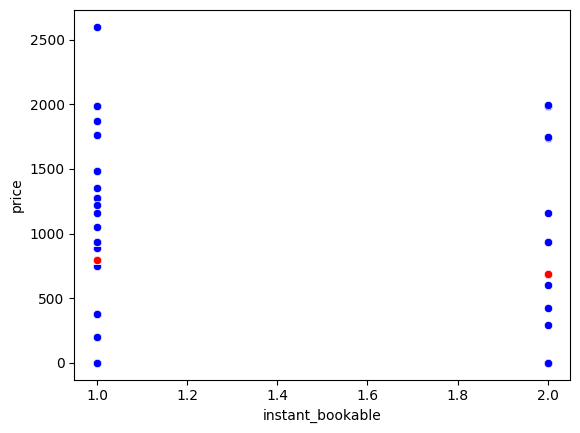

In [85]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [86]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.004883991395986054

In [87]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.06988555928077025)